In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [5]:
# import datasets
df = pd.read_csv('drive/MyDrive/Colab Notebooks/data/titanic.csv', index_col='PassengerId')

# lihat 5 data awal untuk proses preprocessing
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Quick Exploratory Data Analysis**



In [6]:
# drop features yang tidak diperlukan
df.drop(columns=['Name', 'Ticket'], inplace=True);

In [ ]:
# import library untuk lihat data yang missing
!pip install jcopml
from jcopml.plot import plot_missing_value

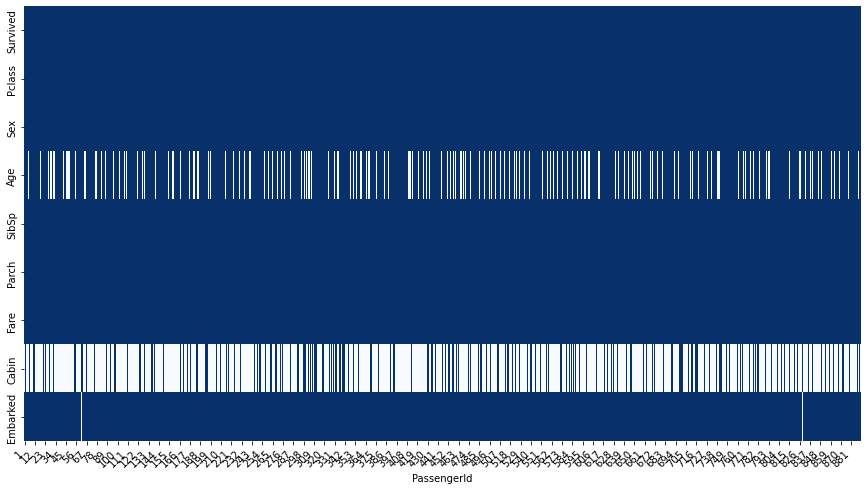

In [8]:
# visualisasi untuk melihat missing pada features
plot_missing_value(df)

In [9]:
# drop kembali features yang banyak missing value
df.drop(columns=["Age", "Cabin"], inplace=True)

In [10]:
# melihat data embarked yang sering muncul, untuk mengisi data yang missing
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
# imput atau mengisi data yang kosong pada features Embarked
df.fillna({"Embarked": "S"}, inplace=True)

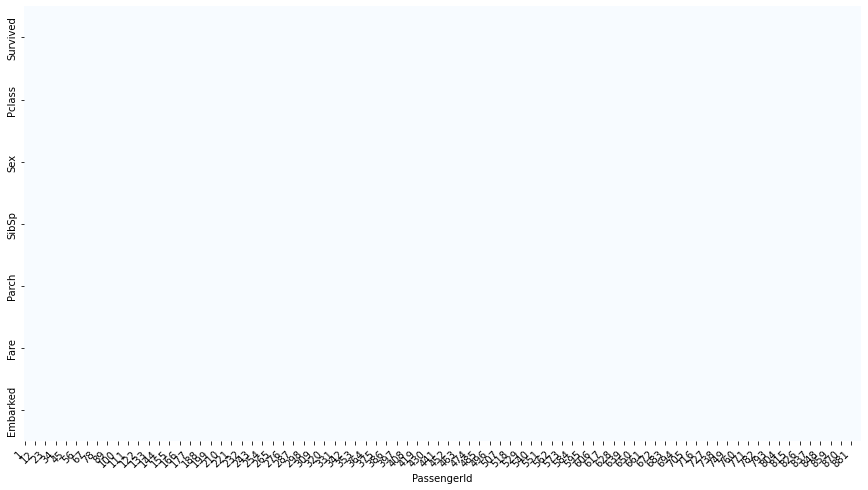

In [12]:
# visualisasi untuk melihat missing pada features
plot_missing_value(df)

# **Persiapan data**
memecah menjadi 2 bagian
features (X) dan target (y)

In [13]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,1,0,7.2500,S
2,1,1,female,1,0,71.2833,C
3,1,3,female,0,0,7.9250,S
4,1,1,female,1,0,53.1000,S
5,0,3,male,0,0,8.0500,S


In [14]:
X = df.drop(columns="Survived")
y = df.Survived

# one hot encoding untuk data kategorik
X = pd.get_dummies(X, columns=["Pclass", "Sex", "Embarked"])

In [15]:
# setelah one hot encoding
X

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,1,0,7.2500,0,0,1,0,1,0,0,1
2,1,0,71.2833,1,0,0,1,0,1,0,0
3,0,0,7.9250,0,0,1,1,0,0,0,1
4,1,0,53.1000,1,0,0,1,0,0,0,1
5,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,0,13.0000,0,1,0,0,1,0,0,1
888,0,0,30.0000,1,0,0,1,0,0,0,1
889,1,2,23.4500,0,0,1,1,0,0,0,1


# **Sckit Learn**

In [16]:
# import sklearn
from sklearn.neighbors import KNeighborsClassifier

In [17]:
# mengambil objek knn
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [18]:
# cek hasil prediksi
knn.score(X, y)

0.8361391694725028

# **Datasets Spliting**
modeling menggunakan data spliting

In [19]:
# stratify shuffle split for classification
# import train test split
from sklearn.model_selection import train_test_split

In [20]:
X = df.drop(columns="Survived")
y = df.Survived # label

# one hot encoding untuk data kategorik
X = pd.get_dummies(X, columns=["Pclass", "Sex", "Embarked"])

In [21]:
# split train test data
# stratify berdasarkan label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [22]:
# lihat hasil data setelah spliting
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712,), (179,))

In [23]:
# modeling dengan KNN

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
# cara cek overfitting :
# jika hasil pada training dan testing berbeda jauh
# maka itu terjadi overfitting
# jika overfitting prediksi yang terlalu kaku dan tidak fleksibel pada data yang baru

knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.9199438202247191, 0.6815642458100558)

# **Concept 2: K-fold Validation**
modeling menggunakan konsep k-fold validation

In [25]:
# import kfold
from sklearn.model_selection import cross_val_score

In [26]:
knn = KNeighborsClassifier(n_neighbors=1)
cross_val_score(knn, X, y, cv=10)

array([0.7       , 0.71910112, 0.71910112, 0.66292135, 0.83146067,
       0.80898876, 0.65168539, 0.70786517, 0.74157303, 0.7752809 ])

In [27]:
# karena k-fold menghasilkan masing-masing nilai sesuai jumlah foldnya
# maka kita akan mengambil nilai mean nya sebagai acuan
cross_val_score(knn, X, y, cv=10).mean()

0.7317977528089887

# **Improvement melalui data: Feature Scaling**


In [28]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,1,0,7.2500,S
2,1,1,female,1,0,71.2833,C
3,1,3,female,0,0,7.9250,S
4,1,1,female,1,0,53.1000,S
5,0,3,male,0,0,8.0500,S


In [30]:
# import scaler yaitu minmax
from sklearn.preprocessing import MinMaxScaler

In [35]:
# membuat objek scaler
scaler = MinMaxScaler()
scaler.fit(X_train)

# transform data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# lihat hasil scale
X_train_scaled

array([[0.        , 0.        , 0.11027246, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.43288417, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.125     , 0.5       , 0.06709553, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.075147  , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.05182215, ..., 0.        , 0.        ,
        1.        ]])

In [36]:
# modeling lagi setelah di scale
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [37]:
# melihat hasil score
knn.score(X_train_scaled, y_train), knn.score(X_test_scaled, y_test)

(0.9185393258426966, 0.7430167597765364)

# **Improvement melalui model: Parameter Tuning**
Tuning n_neighbors tanpa scaling

In [39]:
neighbors = range(1, 51, 2)

# tampung hasil testing
test_score = []
# tampung hasil training
train_score = []

# looping untuk mendapatkan score terbaik dan k ter ideal
for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)

  # tampung hasil score ke dalam array
  test_score.append(knn.score(X_test, y_test))
  train_score.append(knn.score(X_train, y_train))

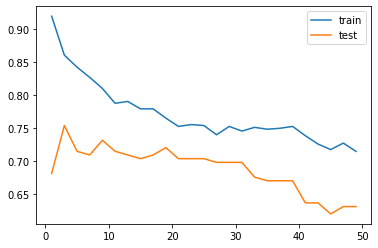

In [41]:
# tampilkan hasil score menggunakan plot
plt.plot(neighbors, train_score, label="train")
plt.plot(neighbors, test_score, label="test")
plt.legend()

In [42]:
# tampilkan score dan k terbaik
print(f"Max test score: {np.max(test_score)}")
print(f"n_neighbor: {neighbors[np.argmax(test_score)]}")

Max test score: 0.7541899441340782
n_neighbor: 3


# **Improvement melalui model: Parameter Tuning**
Tuning n_neighbors dengan scaling

Max test score: 0.7988826815642458
n_neighbor: 29


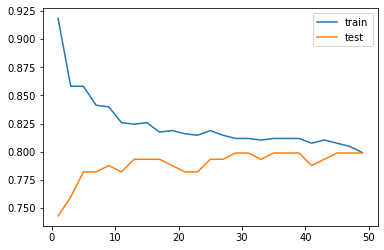

In [44]:
neighbors = range(1, 51, 2)

# tampung hasil testing
test_score = []
# tampung hasil training
train_score = []

# looping untuk mendapatkan score terbaik dan k ter ideal
for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled, y_train)

  # tampung hasil score ke dalam array
  test_score.append(knn.score(X_test_scaled, y_test))
  train_score.append(knn.score(X_train_scaled, y_train))

# tampilkan hasil score menggunakan plot
plt.plot(neighbors, train_score, label="train")
plt.plot(neighbors, test_score, label="test")
plt.legend()

# tampilkan score dan k terbaik
print(f"Max test score: {np.max(test_score)}")
print(f"n_neighbor: {neighbors[np.argmax(test_score)]}")

# **Improvement melalui model: Parameter Tuning**
Tuning n_neighbors dengan weight by distance

Max test score: 0.7988826815642458
n_neighbor: 49


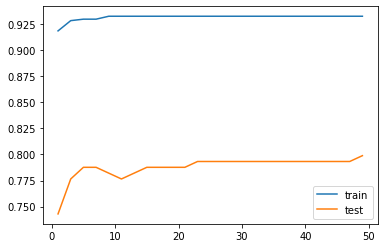

In [45]:
neighbors = range(1, 51, 2)

# tampung hasil testing
test_score = []
# tampung hasil training
train_score = []

# looping untuk mendapatkan score terbaik dan k ter ideal
for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors=k, weights="distance")
  knn.fit(X_train_scaled, y_train)

  # tampung hasil score ke dalam array
  test_score.append(knn.score(X_test_scaled, y_test))
  train_score.append(knn.score(X_train_scaled, y_train))

# tampilkan hasil score menggunakan plot
plt.plot(neighbors, train_score, label="train")
plt.plot(neighbors, test_score, label="test")
plt.legend()

# tampilkan score dan k terbaik
print(f"Max test score: {np.max(test_score)}")
print(f"n_neighbor: {neighbors[np.argmax(test_score)]}")

# **Improvement melalui model: Parameter Tuning**
Tuning n_neighbors dengan weight by manhattan distance

Max test score: 0.7988826815642458
n_neighbor: 29


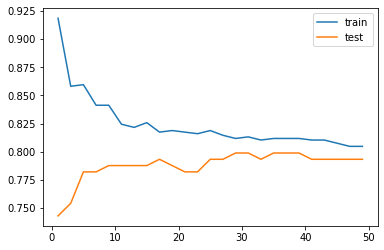

In [46]:
neighbors = range(1, 51, 2)

# tampung hasil testing
test_score = []
# tampung hasil training
train_score = []

# looping untuk mendapatkan score terbaik dan k ter ideal
for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors=k, p=1)
  knn.fit(X_train_scaled, y_train)

  # tampung hasil score ke dalam array
  test_score.append(knn.score(X_test_scaled, y_test))
  train_score.append(knn.score(X_train_scaled, y_train))

# tampilkan hasil score menggunakan plot
plt.plot(neighbors, train_score, label="train")
plt.plot(neighbors, test_score, label="test")
plt.legend()

# tampilkan score dan k terbaik
print(f"Max test score: {np.max(test_score)}")
print(f"n_neighbor: {neighbors[np.argmax(test_score)]}")